In [30]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [31]:
df = pd.read_csv(r'C:\Users\priyadharshini\Desktop\github\CartEase-chatbot\data\shopping_chatbot_intents.csv')


# Step 1: Preprocessing

In [32]:
X = df['question']                             # Features
y = df['intent']

vectorizer = TfidfVectorizer() # Convert text to TF-IDF features
X_vectorized = vectorizer.fit_transform(X)

label_encoder = LabelEncoder()               # Encode labels
y_encoded = label_encoder.fit_transform(y)

# Step 2: Train-Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

# step 3: Hyperparameter tuning with GridSearchCV 😉

In [41]:
# Hyperparameter grids
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']}
param_grid_nb = {'alpha': [0.01, 0.1, 0.5, 1.0]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'],'gamma': ['scale', 'auto'], 'degree': [2, 3]}


# Grid searches
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5)
grid_nb.fit(X_train, y_train)

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)


# Predictions
y_pred_lr = grid_lr.predict(X_test)
y_pred_nb = grid_nb.predict(X_test)
y_pred_svm = grid_svm.predict(X_test)


# Calculate accuracy for each model
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy Scores After Hyperparameter Tuning:")
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"Naive Bayes Accuracy: {acc_nb:.2f}")
print(f"SVM Accuracy: {acc_svm:.2f}")



Accuracy Scores After Hyperparameter Tuning:
Logistic Regression Accuracy: 0.69
Naive Bayes Accuracy: 0.56
SVM Accuracy: 0.69


# Visualization

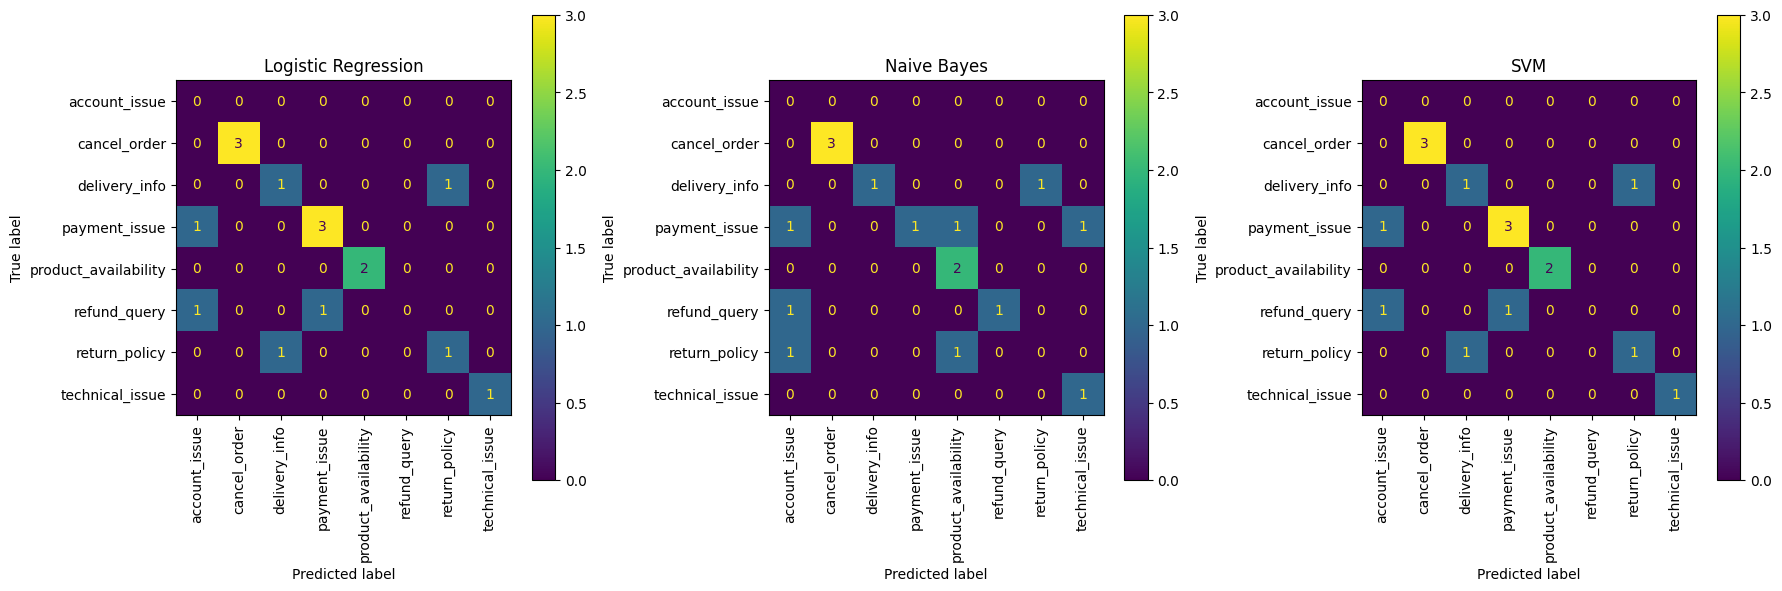

In [ ]:
# confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=label_encoder.classes_, ax=axes[0], xticks_rotation='vertical')
axes[0].set_title("Logistic Regression")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, display_labels=label_encoder.classes_, ax=axes[1], xticks_rotation='vertical')
axes[1].set_title("Naive Bayes")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=label_encoder.classes_, ax=axes[2], xticks_rotation='vertical')
axes[2].set_title("SVM")
plt.tight_layout()
plt.show()

In [ ]:
import os
import joblib

if not os.path.exists('model'):
    os.makedirs('model')

joblib.dump(grid_svm.best_estimator_, 'model/model_svm.pkl')

joblib.dump(vectorizer, 'model/vectorizer.pkl')
joblib.dump(label_encoder, 'model/label_encoder.pkl')

print("Best SVM model and components saved successfully!")


Best SVM model and components saved successfully!
